In [3]:
import pandas as pd
# Load the dataset
df = pd.read_csv(r"C:\Users\adnan\Downloads\archive (4)\Titanic-Dataset.csv")
# View basic info
print(df.info())
# Check missing values
print("\nMissing values:\n", df.isnull().sum())
# Handle missing data
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

print("\nCleaned Data Preview:")
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked    

C:\Users\adnan\AppData\Local\Temp\ipykernel_9492\3351824496.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\adnan\AppData\Local\Temp\ipykernel_9492\3351824496.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e


Cleaned Data Preview:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])        # male=1, female=0
df['Embarked'] = label_enc.fit_transform(df['Embarked'])  # S, C, Q -> 2, 0, 1

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

print(df.head())


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         0       3    1 -0.565736      1      0 -0.502445         2
1         1       1    0  0.663861      1      0  0.786845         0
2         1       3    0 -0.258337      0      0 -0.488854         2
3         1       1    0  0.433312      1      0  0.420730         2
4         0       3    1  0.433312      0      0 -0.486337         2


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])       
df['Embarked'] = le.fit_transform(df['Embarked'])  


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


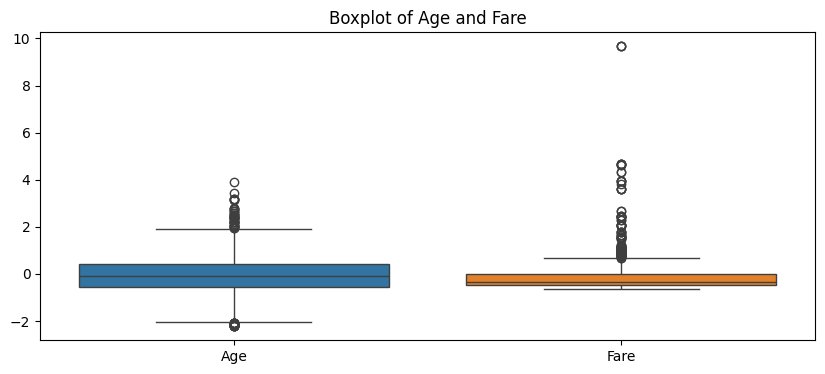

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot of Age and Fare")
plt.show()

Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Fare']] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [9]:
df.to_csv("cleaned_titanic.csv", index=False)

In [10]:
cleaned_df = pd.read_csv("cleaned_titanic.csv")
cleaned_df.head()  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,3,0,-0.258337,0,0,-0.488854,2
2,1,1,0,0.433312,1,0,0.420730,2
3,0,3,1,0.433312,0,0,-0.486337,2
4,0,3,1,-0.104637,0,0,-0.478116,1


In [11]:
print("Shape:", cleaned_df.shape)
print(cleaned_df.describe())
print(cleaned_df.dtypes)

Shape: (721, 8)
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  721.000000  721.000000  721.000000  721.000000  721.000000  721.000000   
mean     0.337032    2.509015    0.679612   -0.097389    0.414702    0.323162   
std      0.473024    0.717046    0.466950    0.770186    0.853916    0.788549   
min      0.000000    1.000000    0.000000   -2.025883    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   -0.565736    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   -0.104637    0.000000    0.000000   
75%      1.000000    3.000000    1.000000    0.279612    1.000000    0.000000   
max      1.000000    3.000000    1.000000    1.893459    5.000000    6.000000   

             Fare    Embarked  
count  721.000000  721.000000  
mean    -0.298283    1.610264  
std      0.273087    0.727900  
min     -0.648422    0.000000  
25%     -0.489442    2.000000  
50%     -0.401268    2.000000  
75%     -0.124920    2.000000 

In [12]:
pd.set_option('display.max_rows', None)
cleaned_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,3,0,-0.258337,0,0,-0.488854,2
2,1,1,0,0.433312,1,0,0.420730,2
3,0,3,1,0.433312,0,0,-0.486337,2
4,0,3,1,-0.104637,0,0,-0.478116,1
5,0,1,1,1.893459,0,0,0.395814,2
6,1,3,0,-0.181487,0,2,-0.424256,2
7,1,2,0,-1.180535,1,0,-0.042956,0
8,1,3,0,-1.949034,1,1,-0.312172,2
9,0,3,1,-0.719436,0,0,-0.486337,2


In [14]:
cleaned_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
650,0,2,1,0.740711,0,0,-0.386671,2
472,0,3,1,-0.104637,0,0,-0.486337,2
649,0,3,0,-0.873136,0,0,-0.491874,2
176,0,2,1,0.049062,0,0,-0.386671,2
238,0,2,1,0.510161,0,0,-0.389188,0
513,0,3,1,0.202762,0,0,-0.488854,2
636,0,2,1,-1.026836,0,0,-0.124920,2
510,0,1,1,-0.104637,0,0,-0.648422,2
353,0,2,1,0.125912,0,0,-0.437007,2
537,1,1,0,-0.104637,1,0,0.398582,2
